# 설정

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline
#한글 설정
plt.rc("font", family="HYHeadLine-Medium")
# plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False) # y축

# 경고 메세지 안 보이게 
import warnings
warnings.filterwarnings(action='ignore')
# warnings.filterwarnings(action='default')

In [2]:
import seaborn as sns
import pandas as pd 
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)

# 데이터 불러오기

In [3]:
csv_body=pd.read_csv('체력측정 항목별 측정데이터\KS_NFA_FTNESS_MESURE_ITEM_MESURE_INFO_201701.csv')

In [4]:
list_y2017=[]
for i in range(1,13):
    if len(str(i))==1:
        list_y2017.append(pd.read_csv('체력측정 항목별 측정데이터\KS_NFA_FTNESS_MESURE_ITEM_MESURE_INFO_20170'+str(i)+'.csv'))
    elif len(str(i))==2:
        list_y2017.append(pd.read_csv('체력측정 항목별 측정데이터\KS_NFA_FTNESS_MESURE_ITEM_MESURE_INFO_2017'+str(i)+'.csv'))
y2017 = pd.DataFrame([], columns=list_y2017[0].columns)
for item in list_y2017:
    y2017 =pd.concat([y2017, item])

list_y2018=[]
for i in range(1,13):
    if len(str(i))==1:
        list_y2018.append(pd.read_csv('체력측정 항목별 측정데이터\KS_NFA_FTNESS_MESURE_ITEM_MESURE_INFO_20180'+str(i)+'.csv'))
    elif len(str(i))==2:
        list_y2018.append(pd.read_csv('체력측정 항목별 측정데이터\KS_NFA_FTNESS_MESURE_ITEM_MESURE_INFO_2018'+str(i)+'.csv'))
        
y2018 = pd.DataFrame([], columns=list_y2018[0].columns)
for item in list_y2018:
    y2018 =pd.concat([y2018, item])

list_y2019=[]
for i in range(1,13):
    if len(str(i))==1:
        list_y2019.append(pd.read_csv('체력측정 항목별 측정데이터\KS_NFA_FTNESS_MESURE_ITEM_MESURE_INFO_20190'+str(i)+'.csv'))
    elif len(str(i))==2:
        list_y2019.append(pd.read_csv('체력측정 항목별 측정데이터\KS_NFA_FTNESS_MESURE_ITEM_MESURE_INFO_2019'+str(i)+'.csv'))

y2019 = pd.DataFrame([], columns=list_y2019[0].columns)
for item in list_y2019:
    y2019 =pd.concat([y2019, item])

combined_data=pd.concat([y2017,y2018,y2019],ignore_index=True)
combined_data.columns=['측정회차','센터명','나이구분','측정구분','측정나이','입력구분','상장구분','측정일','측정회원성별',
                      '신장:cm','체중:kg','체지방율%','허리둘레:cm','혈압(최저):mmHg','혈압(최고):mmHg','악력D:kg','악력ND:kg',
                      '윗몸말아올리기:회','반복점프:회','미정','앉아윗몸앞으로굽히기:cm','일리노이:초','체공시간:초','협응력시간:초',
                      '협응력실수횟수:회','협응력계산결과값:초','BMI:kg/m','교차윗몸일으키기:회','왕복오래달리기','10M 4회 왕복달리기:초',
                      '제자리 멀리뛰기:cm','의자에앉았다일어서기:회','6분걷기:m','2분제자리걷기:회','의자에앉아 3M표적 돌아오기:회',
                      '8자보행:초','상대악력:%','피두부결합','왕복오래달리기(출력):Vo2 max','트레드밀_안정시 : bpm','트레드밀_3분 : bpm',
                      '트레드밀_6분 : bpm','트레드밀_9분 : bpm','트레드밀(출력) : VO₂max','스텝검사_회복시 심박수 : bpm','스텝검사(출력) : VO₂max',
                      '허벅지(좌)','허벅지(우)','전신반응 : 초','체공시간2 : 초']

# 결측치 확인 및 제거 , 필요한 컬럼 추출

<AxesSubplot:>

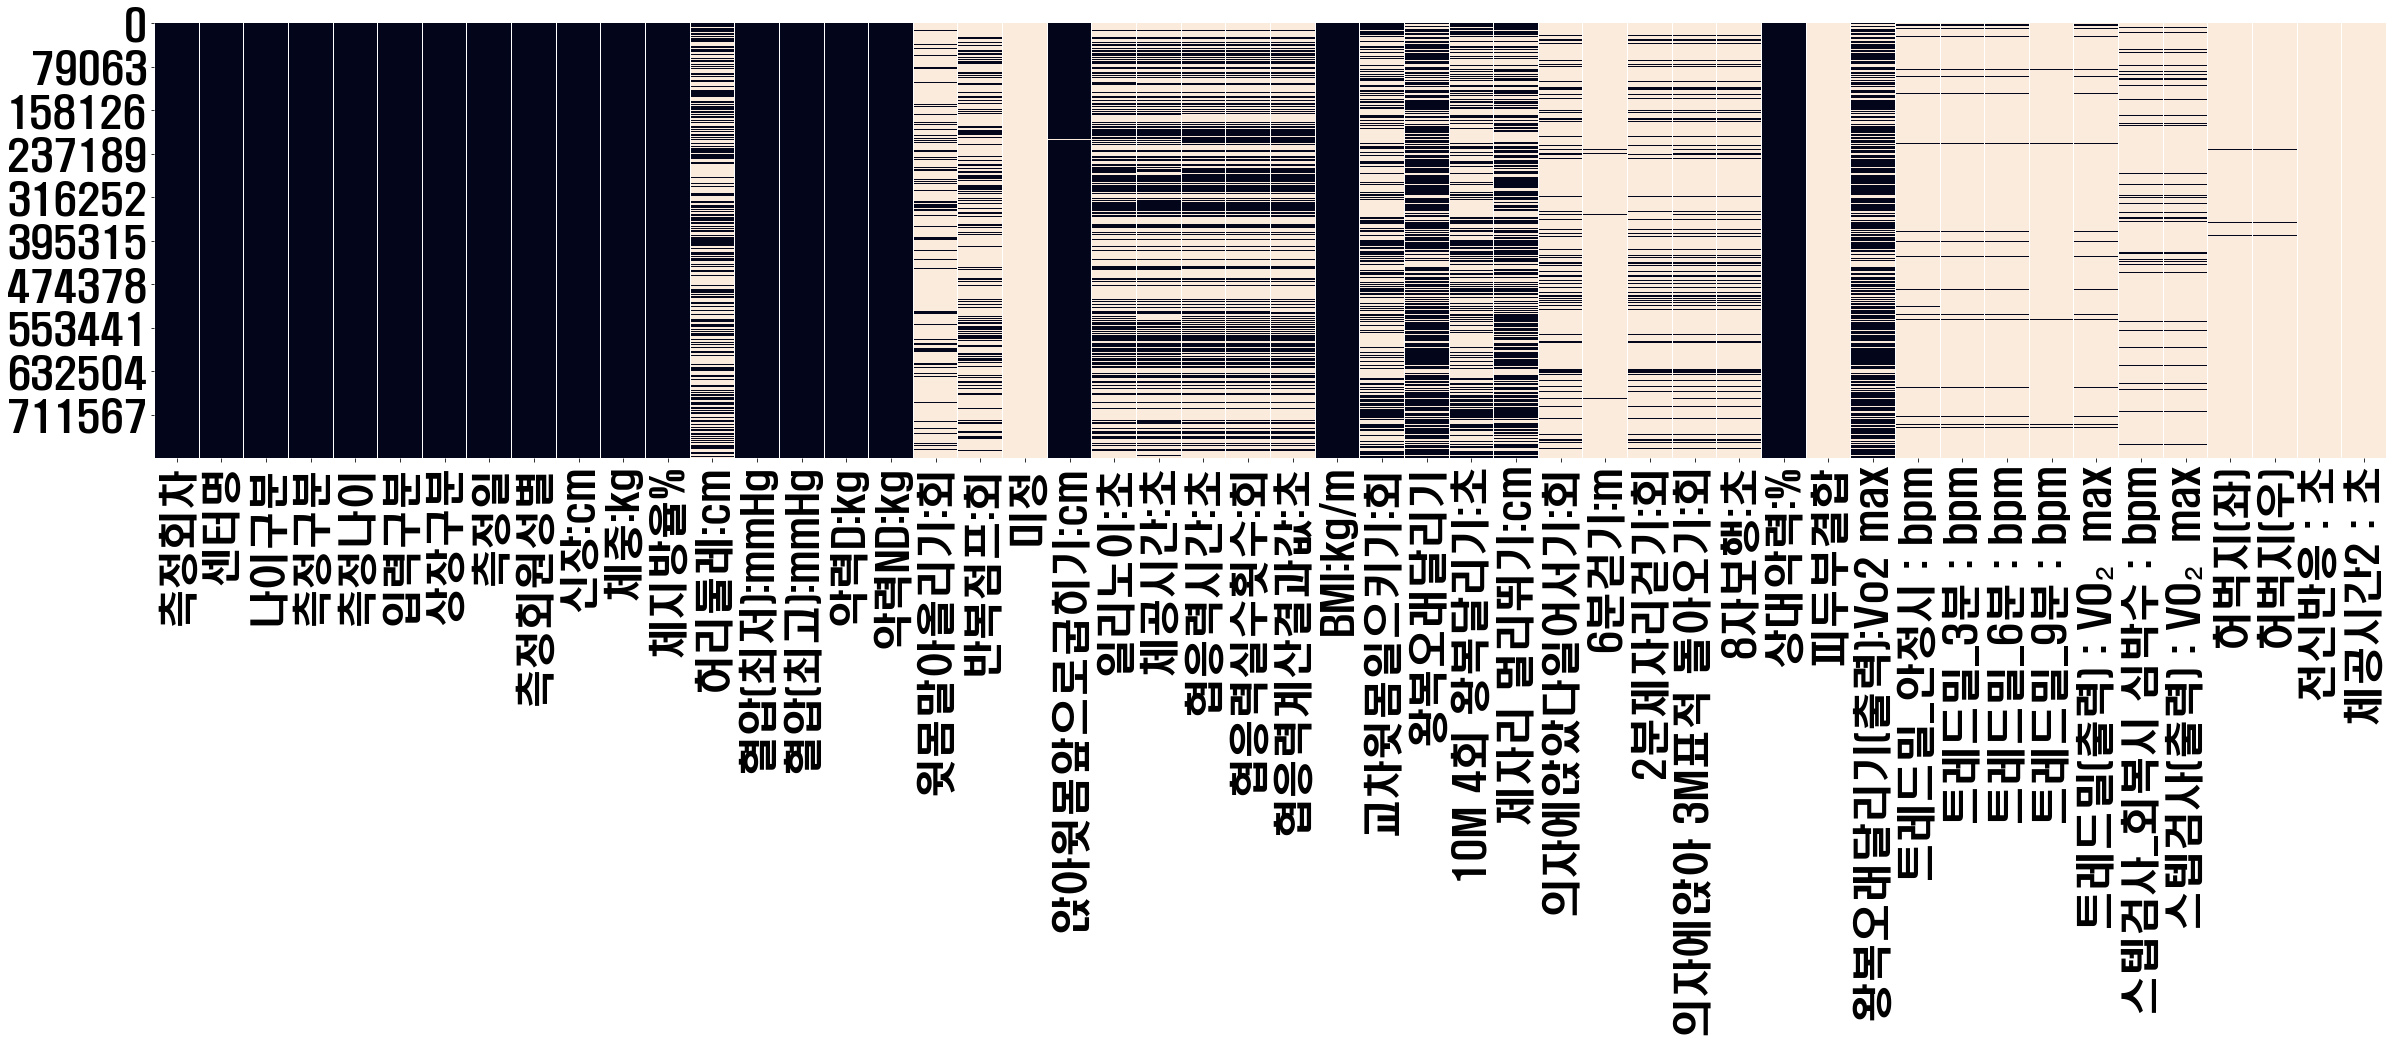

In [5]:
plt.figure(figsize=(40,8))
plt.rc('font', size=40)
sns.heatmap(combined_data.isnull(),cbar=False)

<AxesSubplot:>

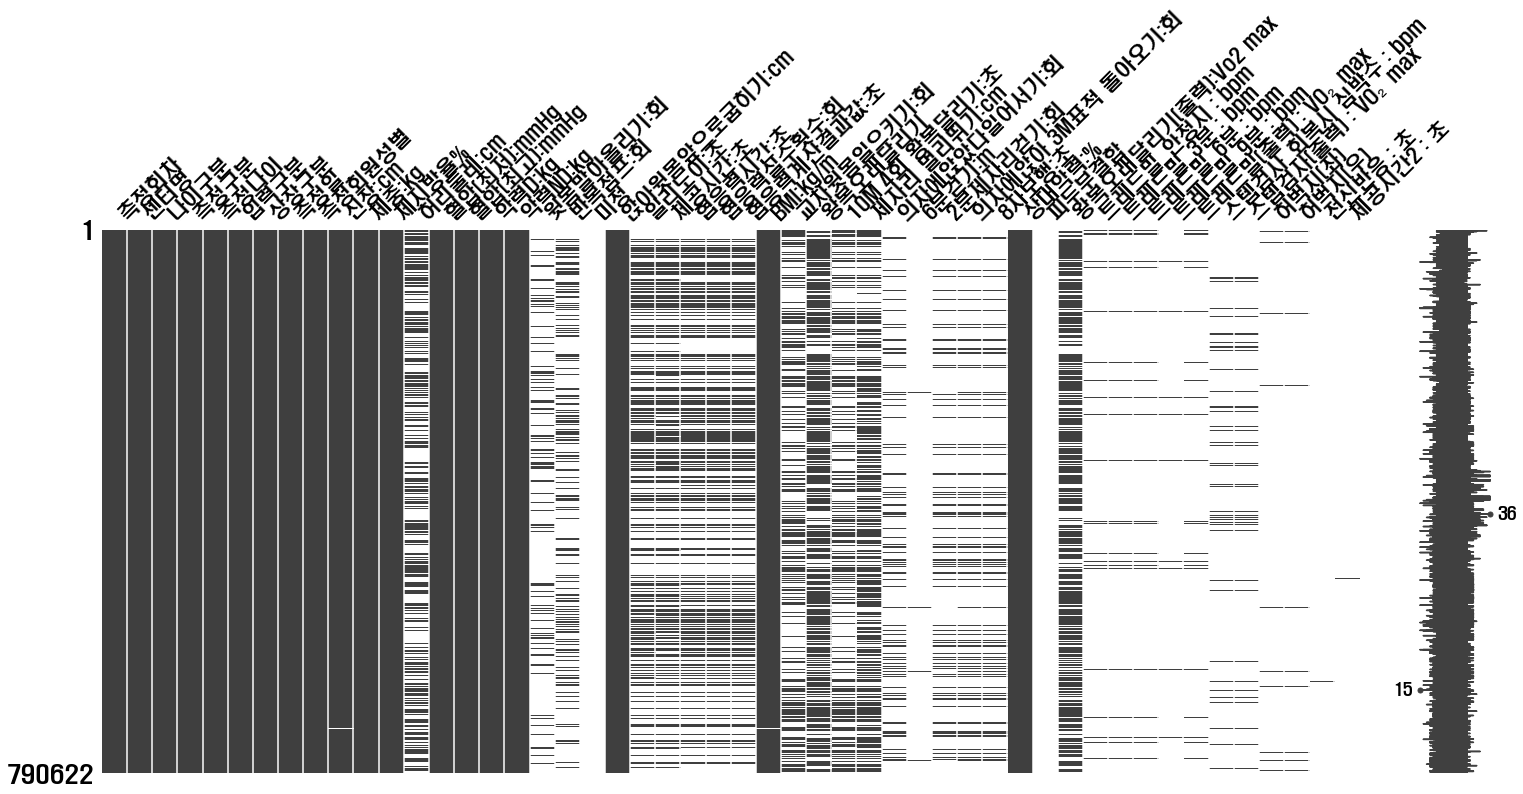

In [6]:
import missingno as msno
msno.matrix(combined_data,fontsize=20)

In [7]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790622 entries, 0 to 790621
Data columns (total 50 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   측정회차                 790622 non-null  object 
 1   센터명                  790622 non-null  object 
 2   나이구분                 790622 non-null  object 
 3   측정구분                 790622 non-null  object 
 4   측정나이                 790622 non-null  object 
 5   입력구분                 790622 non-null  object 
 6   상장구분                 790622 non-null  object 
 7   측정일                  790622 non-null  object 
 8   측정회원성별               790622 non-null  object 
 9   신장:cm                790535 non-null  float64
 10  체중:kg                790540 non-null  float64
 11  체지방율%                790393 non-null  float64
 12  허리둘레:cm              384688 non-null  float64
 13  혈압(최저):mmHg          790545 non-null  float64
 14  혈압(최고):mmHg          790531 non-null  float64
 15  악력D:kg           

In [8]:
combined_data.isnull().sum()

측정회차                        0
센터명                         0
나이구분                        0
측정구분                        0
측정나이                        0
입력구분                        0
상장구분                        0
측정일                         0
측정회원성별                      0
신장:cm                      87
체중:kg                      82
체지방율%                     229
허리둘레:cm                405934
혈압(최저):mmHg                77
혈압(최고):mmHg                91
악력D:kg                   1074
악력ND:kg                  1136
윗몸말아올리기:회              677270
반복점프:회                 557728
미정                     790622
앉아윗몸앞으로굽히기:cm            1871
일리노이:초                 452454
체공시간:초                 453174
협응력시간:초                460998
협응력실수횟수:회              461050
협응력계산결과값:초             460973
BMI:kg/m                   35
교차윗몸일으키기:회             483080
왕복오래달리기                238307
10M 4회 왕복달리기:초         496982
제자리 멀리뛰기:cm            345160
의자에앉았다일어서기:회           665518
6분걷기:m                 785012
2분제자리걷기:회 

In [9]:
combined_data.dropna(how='all',inplace=True)
combined_data.dropna(how='all',inplace=True,axis=1)

In [10]:
combined_data=combined_data.loc[:,['측정회차','센터명','나이구분','측정구분','측정나이','상장구분','측정일','측정회원성별','신장:cm','체중:kg','체지방율%',
               '허리둘레:cm','악력D:kg','BMI:kg/m','교차윗몸일으키기:회','왕복오래달리기','제자리 멀리뛰기:cm','앉아윗몸앞으로굽히기:cm']]

In [11]:
combined_data.dropna(inplace=True)
combined_data.reset_index(inplace=True)
combined_data.drop(columns=['나이구분','측정구분'],inplace=True)
combined_data.drop(columns=['index'],inplace=True)

# combined_data.sort_values(by=['센터명'],axis=0).head(3)
combined_data['측정나이']=combined_data['측정나이'].apply(pd.to_numeric)

combined_data['세대별']=combined_data['측정나이'].map(lambda x : '10대' if 10<=x<20 else \
                        ('20대' if 20<=x<30 else \
                        ('30대' if 30<=x<40 else \
                        ('40대' if 40<=x<50 else \
                        ('50대' if 50<=x<60 else \
                        ('60대' if 60<=x<70 else '70대이상'))))))

#특정  송파 출장 삭제 인덱스 삭제 
combined_data.drop(index=combined_data.loc[combined_data['센터명']=='KSPO송파(출장A)'].index,inplace=True)

In [12]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139399 entries, 0 to 139432
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   측정회차           139399 non-null  object 
 1   센터명            139399 non-null  object 
 2   측정나이           139399 non-null  int64  
 3   상장구분           139399 non-null  object 
 4   측정일            139399 non-null  object 
 5   측정회원성별         139399 non-null  object 
 6   신장:cm          139399 non-null  float64
 7   체중:kg          139399 non-null  float64
 8   체지방율%          139399 non-null  float64
 9   허리둘레:cm        139399 non-null  float64
 10  악력D:kg         139399 non-null  float64
 11  BMI:kg/m       139399 non-null  float64
 12  교차윗몸일으키기:회     139399 non-null  float64
 13  왕복오래달리기        139399 non-null  float64
 14  제자리 멀리뛰기:cm    139399 non-null  float64
 15  앉아윗몸앞으로굽히기:cm  139399 non-null  float64
 16  세대별            139399 non-null  object 
dtypes: float64(10), int64(1), obj

<AxesSubplot:>

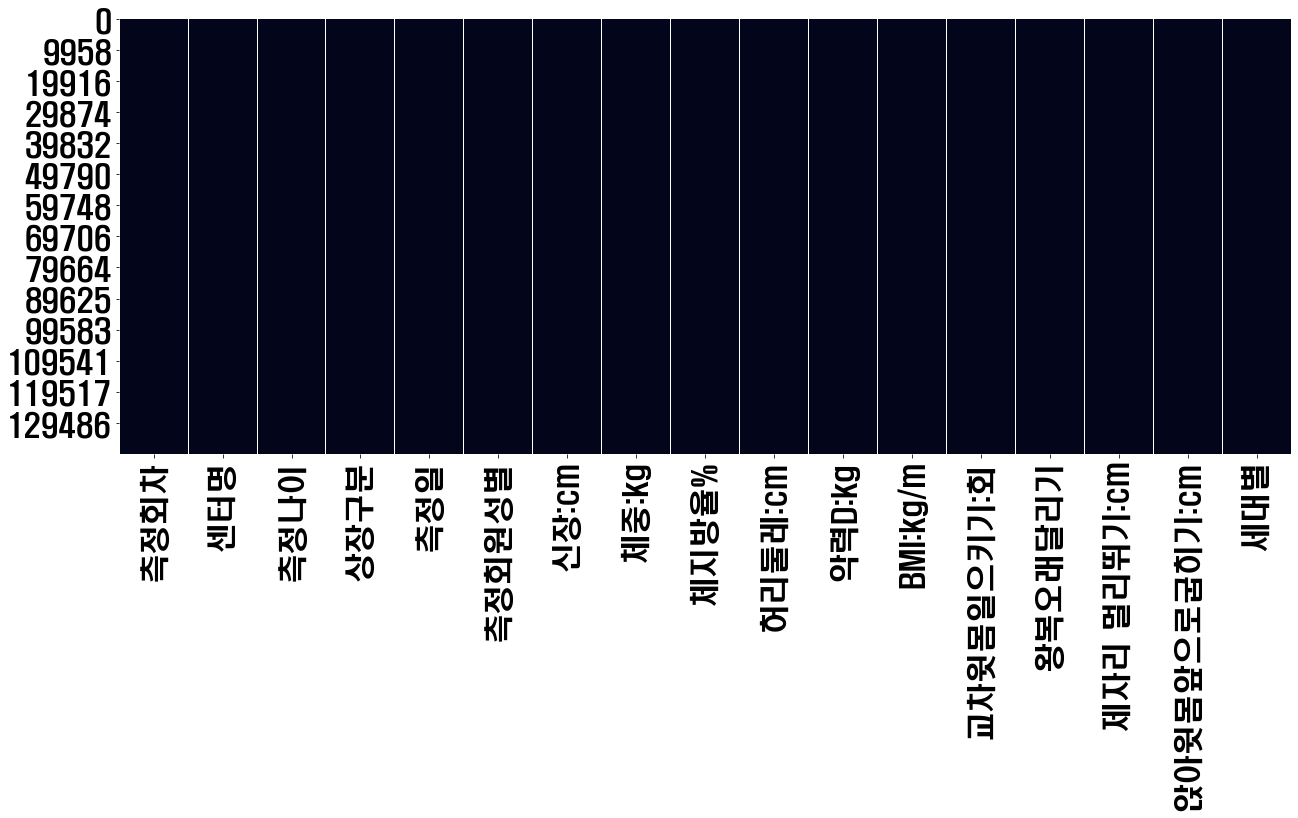

In [13]:
plt.figure(figsize=(21,8))
plt.rc('font', size=30)
sns.heatmap(combined_data.isnull(),cbar=False)

In [14]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139399 entries, 0 to 139432
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   측정회차           139399 non-null  object 
 1   센터명            139399 non-null  object 
 2   측정나이           139399 non-null  int64  
 3   상장구분           139399 non-null  object 
 4   측정일            139399 non-null  object 
 5   측정회원성별         139399 non-null  object 
 6   신장:cm          139399 non-null  float64
 7   체중:kg          139399 non-null  float64
 8   체지방율%          139399 non-null  float64
 9   허리둘레:cm        139399 non-null  float64
 10  악력D:kg         139399 non-null  float64
 11  BMI:kg/m       139399 non-null  float64
 12  교차윗몸일으키기:회     139399 non-null  float64
 13  왕복오래달리기        139399 non-null  float64
 14  제자리 멀리뛰기:cm    139399 non-null  float64
 15  앉아윗몸앞으로굽히기:cm  139399 non-null  float64
 16  세대별            139399 non-null  object 
dtypes: float64(10), int64(1), obj

In [15]:
def area(x):
    if (x=='KSPO송파')or (x=='노원')or (x=='동작')or (x=='마포')or (x=='서초')or (x=='성동'):
        return '서울특별시'
    elif (x=='사하')or (x=='남구(부산)')or (x=='북구(부산)') or(x=='사상'):
        return '부산광역시'
    elif (x=='달서'):
        return '대구광역시'
    elif (x=='연수'):
        return '인천광역시'
    elif (x=='동구(광주)')or (x=='광산'):
        return '광주광역시'
    elif (x=='서구(대전)'):
        return '대전광역시'
    elif (x=='남구(울산)'):
        return '울산광역시'
    elif (x=='세종'):
        return '세종특별자치시'
    elif (x=='금천')or(x=='부천')or(x=='성남')or(x=='오산')or(x=='의정부')or(x=='화성'):
        return '경기도'
    elif (x=='강릉')or(x=='삼척')or(x=='원주')or(x=='춘천'):
        return '강원도'
    elif (x=='영동')or(x=='증평')or(x=='청주')or(x=='충주'):
        return '충청북도'
    elif (x=='사산')or(x=='천안'):
        return '충청남도'
    elif (x=='남원')or(x=='전주'):
        return '전라북도'
    elif (x=='곡성')or(x=='나주')or(x=='목포')or(x=='순천'):
        return '전라남도'
    elif (x=='안동')or(x=='포항'):
        return '경상북도'
    elif (x=='사천')or(x=='창원'):
        return '경상남도'
    elif (x=='제주'):
        return '제주특별자치도'
    else:
        return '없음'

combined_data['행정구역별']=combined_data['센터명'].apply(area)
combined_data['년도']=combined_data['측정일'].apply(lambda x: str(x)[0:4])

# 2019,2018,2017년 데이터

In [16]:
data_2017=combined_data.loc[combined_data['년도']=='2017']
data_2018=combined_data.loc[combined_data['년도']=='2018']
data_2019=combined_data.loc[combined_data['년도']=='2019']
shenti_2019=combined_data.loc[combined_data['년도']=='2019']

data_2017=data_2017[['년도','세대별','행정구역별','상장구분']]
data_2018=data_2018[['년도','세대별','행정구역별','상장구분']]
data_2019=data_2019[['년도','세대별','행정구역별','상장구분']]

datagrouby_2017=data_2017[['년도','행정구역별','상장구분']].groupby(['행정구역별','상장구분']).count().T
datagrouby_2018=data_2018[['년도','행정구역별','상장구분']].groupby(['행정구역별','상장구분']).count().T
datagrouby_2019=data_2019[['년도','행정구역별','상장구분']].groupby(['행정구역별','상장구분']).count().T
datagrouby_2018['인천광역시','1등급']=0
datagrouby_2018=datagrouby_2018[['강원도','경기도','경상남도','경상북도','광주광역시','대구광역시','대전광역시','부산광역시','서울특별시',
                '세종특별자치시','울산광역시','인천광역시','전라남도','전라북도','제주특별자치도','충청남도','충청북도']]
datagrouby_2019['경상남도','2등급']=0
datagrouby_2019=datagrouby_2019[['강원도','경기도','경상남도','경상북도','광주광역시','대구광역시','대전광역시','부산광역시','서울특별시',
                '세종특별자치시','울산광역시','인천광역시','전라남도','전라북도','제주특별자치도','충청남도','충청북도']]

In [17]:
d_2017=[]
for i in range(0,(len(datagrouby_2017.columns)),4):
    all = datagrouby_2017.iloc[:,i][0] +datagrouby_2017.iloc[:,i+1][0]+datagrouby_2017.iloc[:,i+2][0]+datagrouby_2017.iloc[:,i+3][0]
    d_2017.append(all)
print(d_2017 ,end=' ')

d_2018=[]
for i in range(0,(len(datagrouby_2018.columns)),4):
    all = datagrouby_2018.iloc[:,i][0] +datagrouby_2018.iloc[:,i+1][0]+datagrouby_2018.iloc[:,i+2][0]+datagrouby_2018.iloc[:,i+3][0]
    d_2018.append(all)
print(d_2018 ,end=' ')

d_2019=[]
for i in range(0,(len(datagrouby_2019.columns)),4):
    all = datagrouby_2019.iloc[:,i][0] +datagrouby_2019.iloc[:,i+1][0]+datagrouby_2019.iloc[:,i+2][0]+datagrouby_2019.iloc[:,i+3][0]
    d_2019.append(all)
print(d_2019 ,end=' ')

df_practice_2017=pd.DataFrame({'년도':d_2017}).T
df_practice_2018=pd.DataFrame({'년도':d_2018}).T
df_practice_2019=pd.DataFrame({'년도':d_2019}).T

df_practice_2017.columns=[['강원도','경기도','경상남도','경상북도',
                    '광주광역시','대구광역시','대전광역시','부산광역시',
                    '서울특별시','세종특별자치시','울산광역시','인천광역시',
                    '전라남도','전라북도','제주특별자치도','충청남도',
                    '충청북도'],['참가총인원','참가총인원','참가총인원','참가총인원','참가총인원',
                            '참가총인원','참가총인원','참가총인원','참가총인원','참가총인원',
                            '참가총인원','참가총인원','참가총인원','참가총인원','참가총인원',
                            '참가총인원','참가총인원',]]
df_practice_2017.columns.names=['행정구역별','상장구분']
df_practice_2018.columns=[['강원도','경기도','경상남도','경상북도',
                    '광주광역시','대구광역시','대전광역시','부산광역시',
                    '서울특별시','세종특별자치시','울산광역시','인천광역시',
                    '전라남도','전라북도','제주특별자치도','충청남도',
                    '충청북도'],['참가총인원','참가총인원','참가총인원','참가총인원','참가총인원',
                            '참가총인원','참가총인원','참가총인원','참가총인원','참가총인원',
                            '참가총인원','참가총인원','참가총인원','참가총인원','참가총인원',
                            '참가총인원','참가총인원',]]
df_practice_2018.columns.names=['행정구역별','상장구분']
df_practice_2019.columns=[['강원도','경기도','경상남도','경상북도',
                    '광주광역시','대구광역시','대전광역시','부산광역시',
                    '서울특별시','세종특별자치시','울산광역시','인천광역시',
                    '전라남도','전라북도','제주특별자치도','충청남도',
                    '충청북도'],['참가총인원','참가총인원','참가총인원','참가총인원','참가총인원',
                            '참가총인원','참가총인원','참가총인원','참가총인원','참가총인원',
                            '참가총인원','참가총인원','참가총인원','참가총인원','참가총인원',
                            '참가총인원','참가총인원',]]
df_practice_2019.columns.names=['행정구역별','상장구분']

all_2017=pd.concat([datagrouby_2017,df_practice_2017],axis=1)
all_2018=pd.concat([datagrouby_2018,df_practice_2018],axis=1)
all_2019=pd.concat([datagrouby_2019,df_practice_2019],axis=1)

all_2017=all_2017[['강원도','경기도','경상남도','경상북도','광주광역시','대구광역시','대전광역시','부산광역시','서울특별시',
                '세종특별자치시','울산광역시','인천광역시','전라남도','전라북도','제주특별자치도','충청남도','충청북도']]
all_2018=all_2018[['강원도','경기도','경상남도','경상북도','광주광역시','대구광역시','대전광역시','부산광역시','서울특별시',
                '세종특별자치시','울산광역시','인천광역시','전라남도','전라북도','제주특별자치도','충청남도','충청북도']]
all_2019=all_2019[['강원도','경기도','경상남도','경상북도','광주광역시','대구광역시','대전광역시','부산광역시','서울특별시',
                '세종특별자치시','울산광역시','인천광역시','전라남도','전라북도','제주특별자치도','충청남도','충청북도']]

all_2019=all_2019.T
all_2018=all_2018.T
all_2017=all_2017.T

reorganize_2019=[]
award_2019=[]
for i in range(0,len(all_2019.index),1):
    reorganize_2019.append(all_2019.index[i][0])
    award_2019.append(all_2019.index[i][1])

reorganize_2018=[]
award_2018=[]
for i in range(0,len(all_2018.index),1):
    reorganize_2018.append(all_2018.index[i][0])
    award_2018.append(all_2018.index[i][1])
    
reorganize_2017=[]
award_2017=[]
for i in range(0,len(all_2017.index),1):
    reorganize_2017.append(all_2017.index[i][0])
    award_2017.append(all_2017.index[i][1])

all_2019['행정구역별']=reorganize_2019
all_2018['행정구역별']=reorganize_2018
all_2017['행정구역별']=reorganize_2017
all_2019['상장구분']=award_2019
all_2018['상장구분']=award_2018
all_2017['상장구분']=award_2017    

names=set(reorganize_2019)

data_2019=[]
for i in range(len(all_2019.index)):
    data_2019.append(all_2019['년도'][i]/all_2019['년도'][((i+5)//5)*5-1])
all_2019['백분율']=data_2019
percent_2019=all_2019.loc[all_2019['상장구분']=='참가증']
percent_2019['수상자']=1-percent_2019['백분율']

data_2018=[]
for i in range(len(all_2018.index)):
    data_2018.append(all_2018['년도'][i]/all_2018['년도'][((i+5)//5)*5-1])
all_2018['백분율']=data_2018
percent_2018=all_2018.loc[all_2018['상장구분']=='참가증']
percent_2018['수상자']=1-percent_2018['백분율']

data_2017=[]
for i in range(len(all_2017.index)):
    data_2017.append(all_2017['년도'][i]/all_2017['년도'][((i+5)//5)*5-1])
all_2017['백분율']=data_2017
percent_2017=all_2017.loc[all_2017['상장구분']=='참가증']
percent_2017['수상자']=1-percent_2017['백분율']

healthy_2017=percent_2017[['백분율','수상자']]
healthy_2018=percent_2018[['백분율','수상자']]
healthy_2019=percent_2019[['백분율','수상자']]

healthy_2017.columns=['2017비수상자','2017수상자']
healthy_2018.columns=['2018비수상자','2018수상자']
healthy_2019.columns=['2019비수상자','2019수상자']
health=pd.concat([healthy_2017,healthy_2018,healthy_2019],axis=1)

[2801, 3562, 2078, 591, 4819, 1487, 467, 3844, 7306, 1024, 42, 339, 5129, 3974, 1025, 494, 4286] [4394, 4349, 1251, 1386, 3703, 1770, 221, 3531, 6422, 1462, 628, 34, 4484, 3430, 1381, 361, 4229] [6910, 6788, 13, 2247, 3128, 2407, 356, 4326, 4665, 1485, 1211, 283, 4914, 4785, 2334, 342, 4163] 

In [18]:
image=health[['2017수상자','2018수상자','2019수상자']]
image=image.reset_index()
image.head(3)
image=image[['2017수상자','2018수상자','2019수상자']]
image.index=['강원','경기','경남','경북','광주','대구','대전','부산','서울','세종','울산','인천','전남','전북','제주','충남','충북']

In [19]:
image=image.apply(lambda x:round(x*100,1))

In [20]:
unimage=image.copy()

In [21]:
unimage['2017비수상자']=100-unimage['2017수상자']
unimage['2018비수상자']=100-unimage['2018수상자']
unimage['2019비수상자']=100-unimage['2019수상자']
unimage.drop(columns=['2017수상자','2018수상자','2019수상자'],inplace=True)
image.sort_values(by=['2019수상자','2018수상자','2017수상자'],ascending=False).head(3)
unimage.sort_values(by=['2019비수상자','2018비수상자','2017비수상자'],ascending=False).head(3)

,2017비수상자,2018비수상자,2019비수상자
경남,71.4,61.8,76.9
광주,71.8,72.8,64.6
전남,63.2,63.6,61.6


# 시각화

## 참여자들의 키 몸무게 평균 및 데이터 처리

In [22]:
woman_info_2019=shenti_2019.loc[shenti_2019['측정회원성별']=='F']
man_info_2019=shenti_2019.loc[shenti_2019['측정회원성별']=='M']

###  여성 데이터 기술요약

In [23]:
woman_info_2019.describe().T.iloc[:,1:8]

,mean,std,min,25%,50%,75%,max
측정나이,39.659922,15.704113,19.0,24.0,40.0,55.0,64.0
신장:cm,160.077414,5.934667,127.4,156.0,160.0,164.1,185.1
체중:kg,57.818893,8.563249,26.9,52.1,56.5,62.3,116.4
체지방율%,30.799363,6.494011,1.8,26.2,30.8,35.2,54.5
허리둘레:cm,78.198059,8.717599,42.1,72.1,77.2,83.1,132.6
악력D:kg,23.791490,5.043930,0.0,20.7,23.7,26.7,308.0
BMI:kg/m,22.601954,3.385912,11.9,20.2,22.1,24.5,45.0
교차윗몸일으키기:회,23.833148,13.258324,0.0,14.0,24.0,33.0,100.0
왕복오래달리기,18.131320,9.537321,0.0,11.0,16.0,23.0,105.0
제자리 멀리뛰기:cm,139.346202,29.419960,0.0,121.0,140.0,159.0,1091.0


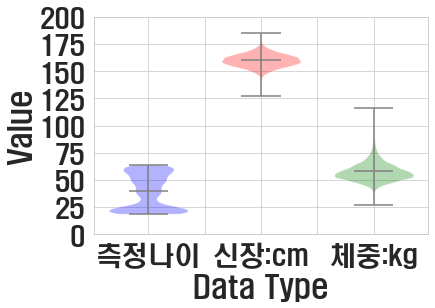

In [117]:
plt.rc("font", family="HYHeadLine-Medium")
# plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False) # y축
sns.set_context("paper", font_scale=3) 
fig,ax =plt.subplots()
sns.set_theme(style="whitegrid")
violin=ax.violinplot([woman_info_2019['측정나이'],
                      woman_info_2019['신장:cm'],
                      woman_info_2019['체중:kg']],
                     showmeans=True,widths=0.7, points=200)
# ax.set_xticklabels(['측정나', '신장:cm', '체중:kg'])
ax.set_xticklabels(['0','측정나이','','신장:cm','','체중:kg'])           
ax.set_xlabel('Data Type')
ax.set_ylabel('Value')
ax.set_ylim(0,200)
violin['bodies'][0].set_facecolor('blue')
violin['bodies'][1].set_facecolor('red')
violin['bodies'][2].set_facecolor('green')

violin['cbars'].set_edgecolor('gray')
violin['cmaxes'].set_edgecolor('gray')
violin['cmins'].set_edgecolor('gray')
violin['cmeans'].set_edgecolor('gray')
plt.show()



<AxesSubplot:>

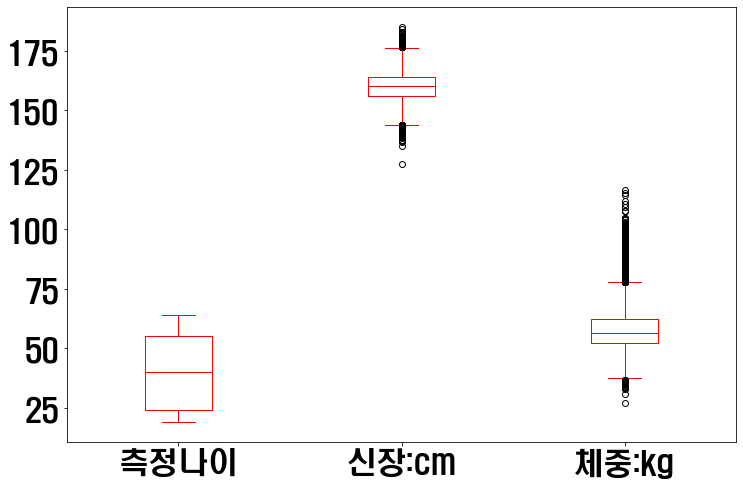

In [20]:
woman_info_2019[['측정나이','신장:cm','체중:kg']].plot.box(color='red',figsize=(12,8),fontsize=30)

### 남성데이터 기술요약

In [50]:
man_info_2019.describe().iloc[1:,0:11].T

,mean,std,min,25%,50%,75%,max
측정나이,32.178555,14.235351,18.0,21.0,26.0,41.0,64.0
신장:cm,173.313870,6.264440,61.4,169.4,173.4,177.4,196.1
체중:kg,73.570459,10.964048,17.9,66.2,72.5,79.6,163.1
체지방율%,20.809535,6.693506,1.6,15.9,20.3,25.2,88.0
허리둘레:cm,84.219223,9.352296,38.5,77.8,83.1,89.3,148.8
악력D:kg,40.437815,7.653852,0.3,35.5,40.3,45.3,110.0
BMI:kg/m,24.468976,3.282324,6.1,22.3,24.1,26.2,131.2
교차윗몸일으키기:회,42.320846,13.366125,0.0,34.0,44.0,52.0,86.0
왕복오래달리기,40.218876,20.008748,0.0,25.0,39.0,53.0,132.0
제자리 멀리뛰기:cm,202.313023,32.564019,0.0,184.0,206.0,224.0,310.0


<AxesSubplot:>

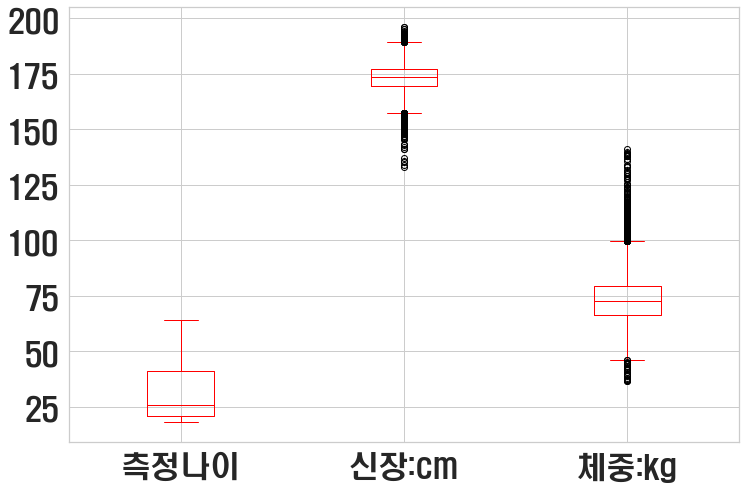

In [99]:
plt.rc("font", family="HYHeadLine-Medium")
# plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False) # y축

man_info_2019[['측정나이','신장:cm','체중:kg']].plot.box(color='red',figsize=(12,8),fontsize=30)

In [92]:
man_info_2019=man_info_2019.reset_index()

In [93]:
import numpy as np
def outliers_iqr(data):
    q1,q3=np.percentile(data,[25,75])
    #넘파이의 값을 퍼센트로 표시해주는 함수
    iqr=q3-q1
    lower_bound=30#q1-(iqr*1.5)
    upper_bound=145#q3+(iqr*1.5)
    return np.where((data > upper_bound)|(data <  lower_bound))

def outliers_iqr2(data):
    q1,q3=np.percentile(data,[25,75])
    #넘파이의 값을 퍼센트로 표시해주는 함수
    iqr=q3-q1
    lower_bound=100#q1-(iqr*1.5)
    upper_bound=200#q3+(iqr*1.5)
    return np.where((data > upper_bound)|(data <  lower_bound))

In [94]:
ex_index=outliers_iqr(man_info_2019[['체중:kg']])[0]
ex_index2=outliers_iqr2(man_info_2019[['신장:cm']])[0]

In [95]:
con_index=np.concatenate((ex_index,ex_index2),axis=None)
con_index

array([ 1590,  9985, 12354, 17761, 20939, 24294,  1590, 15321],
      dtype=int64)

In [96]:
man_info_2019.drop(index=con_index,inplace=True)

<AxesSubplot:>

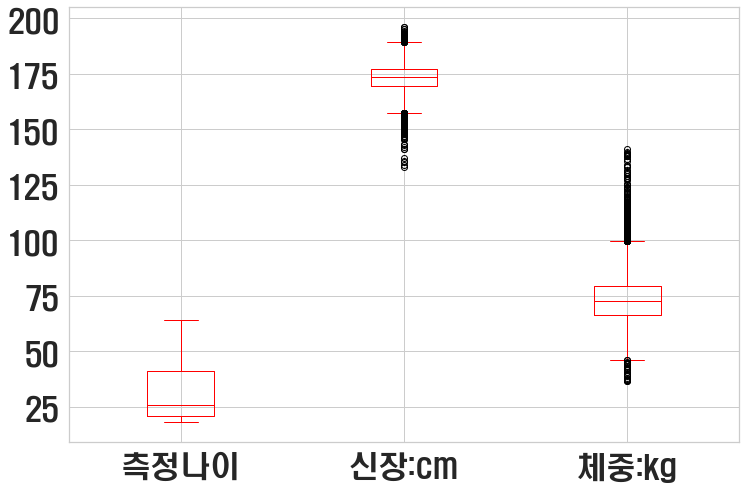

In [100]:
plt.rc("font", family="HYHeadLine-Medium")
# plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False) # y축

man_info_2019[['측정나이','신장:cm','체중:kg']].plot.box(color='red',figsize=(12,8),fontsize=30)

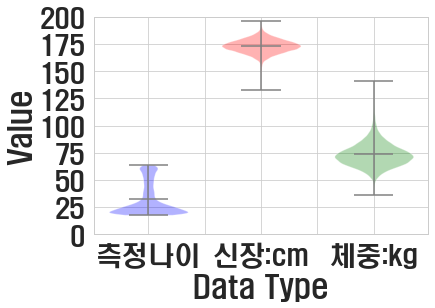

In [118]:
plt.rc("font", family="HYHeadLine-Medium")
# plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False) # y축
sns.set_context("paper", font_scale=3) 
fig,ax =plt.subplots()
sns.set_theme(style="whitegrid")
violin=ax.violinplot([man_info_2019['측정나이'],
                      man_info_2019['신장:cm'],
                      man_info_2019['체중:kg']],
                     showmeans=True,widths=0.7, points=100)
# ax.set_xticklabels(['측정나', '신장:cm', '체중:kg'])
ax.set_xticklabels(['0','측정나이','','신장:cm','','체중:kg'])           
ax.set_xlabel('Data Type')
ax.set_ylabel('Value')
ax.set_ylim(0,200)
violin['bodies'][0].set_facecolor('blue')
violin['bodies'][1].set_facecolor('red')
violin['bodies'][2].set_facecolor('green')

violin['cbars'].set_edgecolor('gray')
violin['cmaxes'].set_edgecolor('gray')
violin['cmins'].set_edgecolor('gray')
violin['cmeans'].set_edgecolor('gray')
plt.show()


## 2019 년도 지역별 수상자 내용

In [29]:
all_2019[['년도']]

년도
행정구역별   상장구분       
강원도     1등급     442
        2등급     885
        3등급    1407
        참가증    4176
        참가총인원  6910
경기도     1등급     586
        2등급    1037
        3등급    1781
        참가증    3384
        참가총인원  6788
경상남도    1등급       1
        3등급       2
        참가증      10
        2등급       0
        참가총인원    13
경상북도    1등급     144
        2등급     307
        3등급     463
        참가증    1333
        참가총인원  2247
광주광역시   1등급     176
        2등급     323
        3등급     607
        참가증    2022
        참가총인원  3128
대구광역시   1등급     160
        2등급     385
        3등급     553
        참가증    1309
        참가총인원  2407
대전광역시   1등급      22
        2등급      55
        3등급      72
        참가증     207
        참가총인원   356
부산광역시   1등급     284
        2등급     544
        3등급     916
        참가증    2582
        참가총인원  4326
서울특별시   1등급     316
        2등급     741
        3등급    1161
        참가증    2447
        참가총인원  4665
세종특별자치시 1등급     188
        2등급     296
        3등급     320
        참가증     681
        참가총인원  1485
울산광역시   1등급     112
        2등급     202
        3등급     324
        참가증     573
        참가총인원  1211
인천광역시   1등급      15
        2등급      46
        3등급      59
        참가증     163
        참가총인원   283
전라남도    1등급     258
        2등급     589
        3등급    1040
        참가증    3027
        참가총인원  4914
전라북도    1등급     389
        2등급     713
        3등급     897
        참가증    2786
        참가총인원  4785
제주특별자치도 1등급     227
        2등급     300
        3등급     482
        참가증    1325
        참가총인원  2334
충청남도    1등급      17
        2등급      65
        3등급     105
        참가증     155
        참가총인원   342
충청북도    1등급     244
        2등급     583
        3등급     896
        참가증    2440
        참가총인원  4163

## 국민건강데이터 3년간 어느지역이 가장 건강 수상자가 많았는지

In [49]:
seaborn_unimage=unimage.copy()
seaborn_unimage['광역자치별']=seaborn_unimage.index
seaborn_unimage.rename(columns={'2019비수상자':'2019년도 비수상자(%)'},inplace=True)
seaborn_image=image.copy()
seaborn_image['광역자치별']=seaborn_image.index
seaborn_image.rename(columns={'2019수상자':'2019년도 수상자(%)'},inplace=True)

Text(0.5, 0, '2019년도 비수상자(%)')

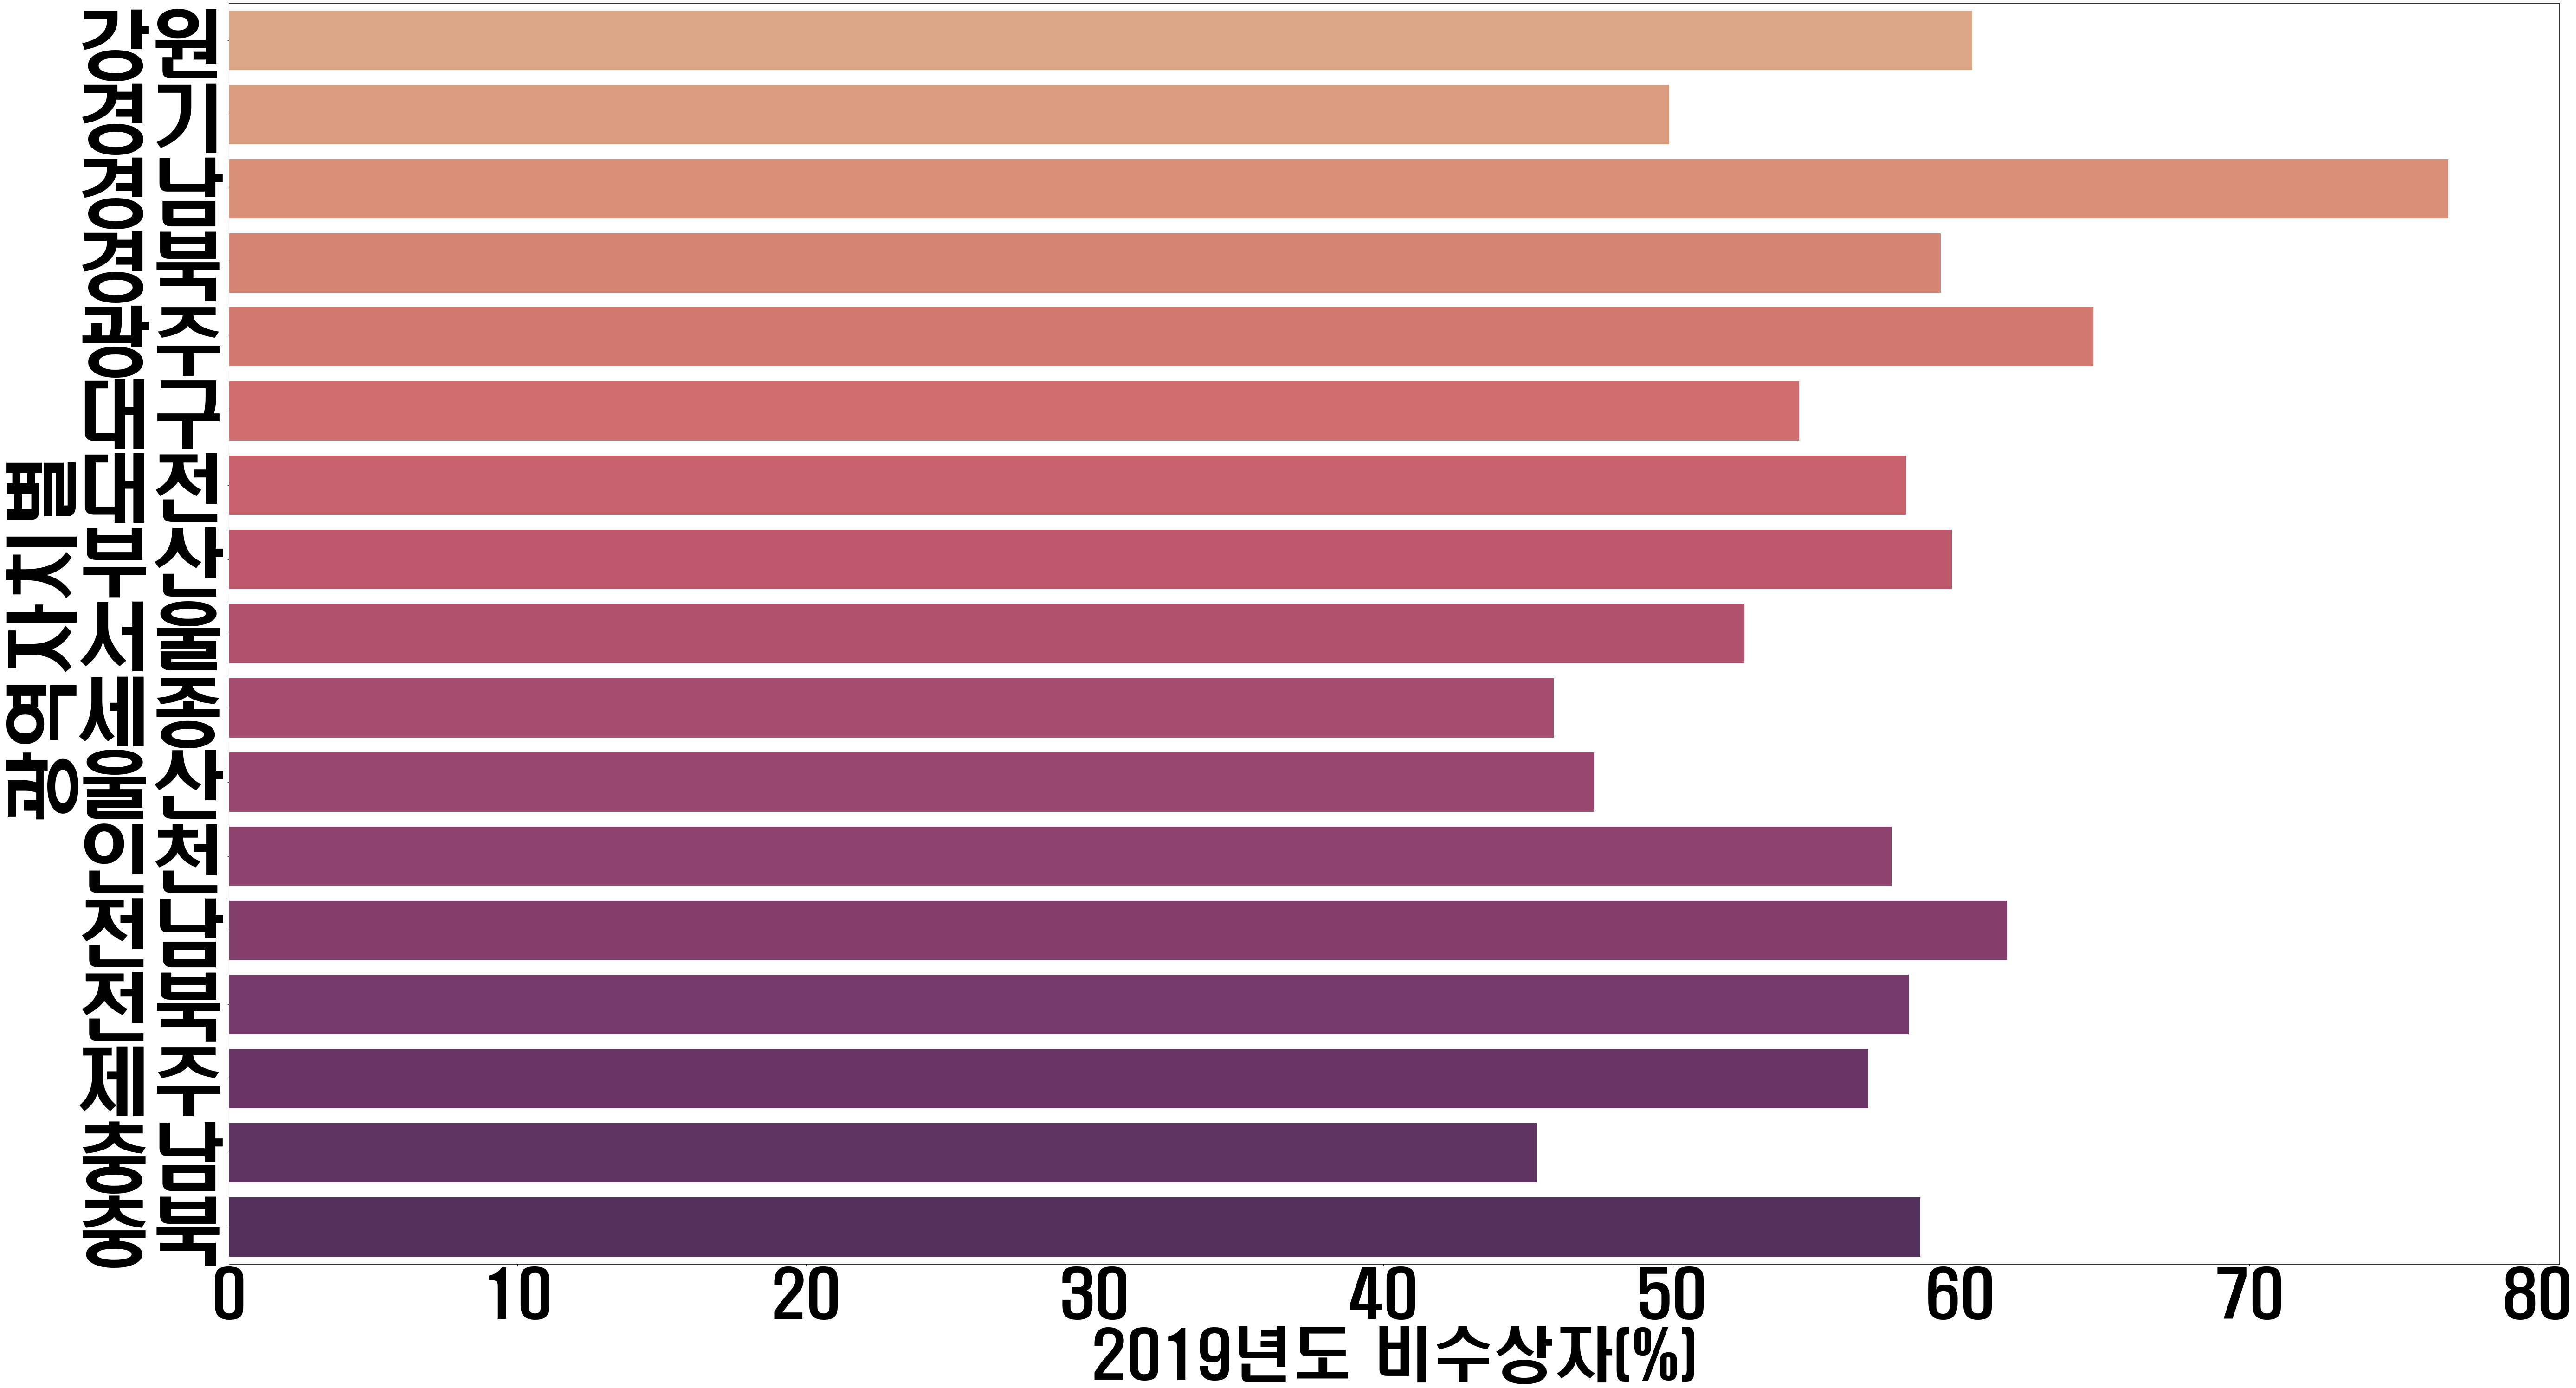

In [85]:
#2019년도 기준 수상자와 비수상자 
plt.figure(figsize=(90,50))
ax=sns.barplot(y=seaborn_unimage['광역자치별'] ,x=seaborn_unimage['2019년도 비수상자(%)'],data=seaborn_unimage,
               palette='flare')
plt.rc('font', size=160)
plt.rc('xtick', labelsize=130)       
ax.set_xlabel('2019년도 비수상자(%)',fontsize=130)

Text(0.5, 0, '2019년도 수상자(%)')

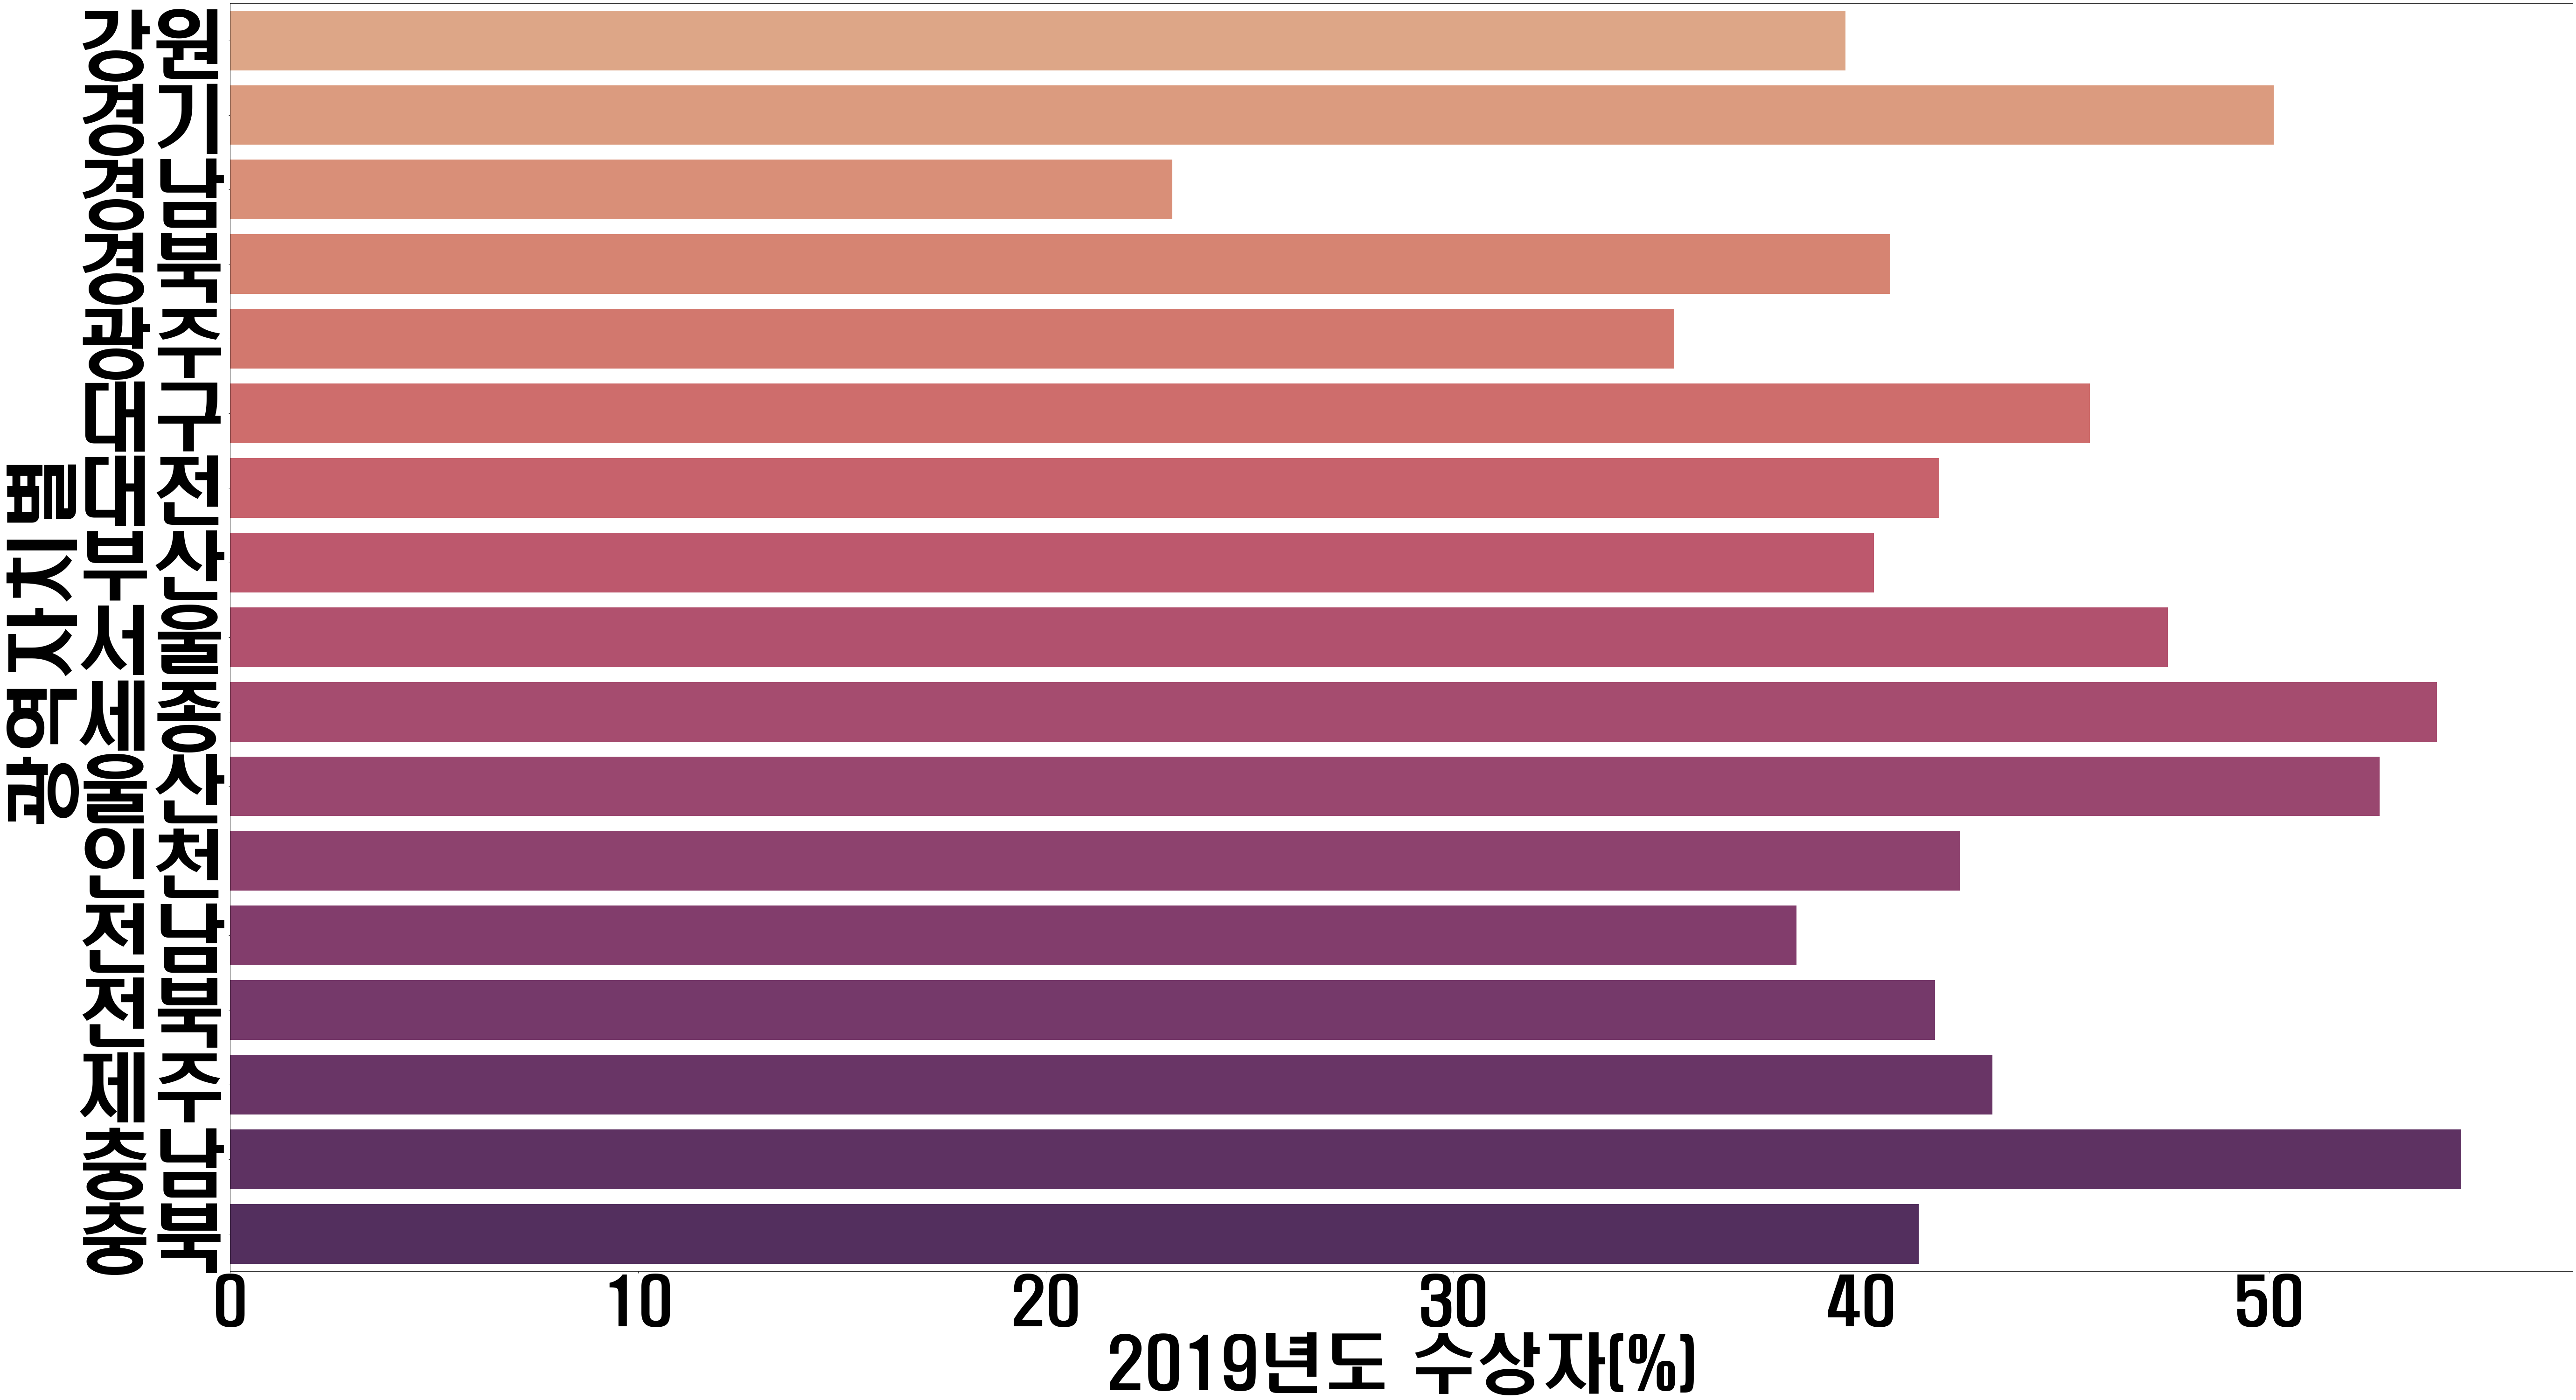

In [84]:
#2019년도 기준 수상자와 비수상자 
plt.figure(figsize=(90,50))
plt.rc('font', size=160)
ax.set_xlabel('2019년도 수상자(%)',fontsize=20)
ax=sns.barplot(y=seaborn_image['광역자치별'] ,x=seaborn_image['2019년도 수상자(%)'],data=seaborn_image,
               palette='flare')
ax.set_xlabel('2019년도 수상자(%)',fontsize=140)

In [52]:
# unimage[['2019비수상자']].plot(kind='bar',figsize=(20,10),fontsize=30)
# plt.legend(fontsize=15)
# plt.xticks(rotation = - 45 )
# title_font = {
#     'fontsize': 40,
#     'fontweight': 'bold'
# }
# plt.title('광역 자치 별(비수상자)',fontdict=title_font,pad=20,loc='left')

In [ ]:
# image[['2019수상자']].plot(kind='bar',figsize=(20,10),fontsize=30)
# plt.legend(fontsize=15)
# plt.xticks(rotation = - 45 )
# title_font = {
#     'fontsize': 40,
#     'fontweight': 'bold'
# }
# plt.title('광역 자치 별(수상자)',fontdict=title_font,pad=20,loc='left')

# 건강과 범죄 상관분석

In [31]:
crime_year=pd.read_excel('data\년도별.범죄.xlsx',index_col=0)
crime_2019=pd.read_excel('data\\2019년도범죄.xlsx',index_col=0)

crime_year.index=['강원','경기','경남','경북','광주','대구','대전','부산','서울','세종','울산','인천','전남','전북','제주','충남','충북']
crime_2019.index=['강원','경기','경남','경북','광주','대구','대전','부산','서울','세종','울산','인천','전남','전북','제주','충남','충북']

corr_data=pd.concat([unimage,crime_year],axis=1)

corr_data.corr()
corr_data=corr_data.corr().iloc[3:6:,0:3]


Text(0.1, 0.3, '   상관관계 ')

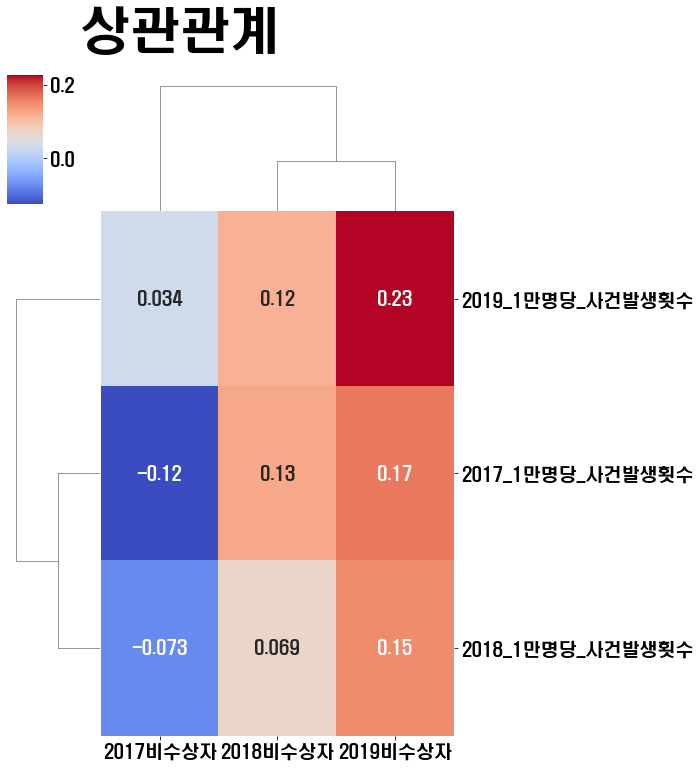

In [48]:
plt.rc('font', size=100)
plt.rcParams['font.size'] = 18
bg_color = (0.88,0.85,0.95)
bg_color1 = '#FFFFFF'
plt.rcParams['figure.facecolor'] = bg_color1
# plt.rcParams['axes.facecolor'] = bg_color
sns.clustermap(corr_data,annot = True,      # 실제 값 화면에 나타내기
               cmap = 'coolwarm',  # Red, Yellow, Blue 색상으로 표시
#                vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
                       annot_kws={"fontsize": 18}, square=True ,
                          cbar=True,)
plt.text(0.1,0.3, "   상관관계 ", fontsize = 50, color='black', fontstyle='italic')

In [33]:
import numpy as np

increase_2017=pd.DataFrame((unimage.iloc[:,1]-unimage.iloc[:,0])/unimage.iloc[:,0])
increase_2018=pd.DataFrame((unimage.iloc[:,2]-unimage.iloc[:,1])/unimage.iloc[:,1])
unimage_increase=pd.concat([increase_2017,increase_2018],axis=1).apply(lambda x: round(x*100,1))
unimage_increase.columns=['2018)비수상자_증가감소율','2019)비수상자_증가감소율']
unimage_increase.head(3)

crime_2017=pd.DataFrame((crime_year.iloc[:,1]-crime_year.iloc[:,0])/crime_year.iloc[:,0])
crime_2018=pd.DataFrame((crime_year.iloc[:,2]-crime_year.iloc[:,1])/crime_year.iloc[:,1])
crime_increase=pd.concat([crime_2017,crime_2018],axis=1).apply(lambda x: round(x*100,1))
crime_increase.columns=['2018)범죄율_증가감소율','2019)범죄율_증가감소율']
crime_increase.head(3)

num_0=crime_increase.copy()
num_0['숫자']=0


# 가설1. 신체등급이 낮은 시민이 많을 지역일 수록 범죄율 또한 높을까?

In [34]:
pd.concat([unimage[['2019비수상자']],crime_year[['2019_1만명당_사건발생횟수']]],axis=1).sort_values(by=['2019비수상자'],ascending=False)

,2019비수상자,2019_1만명당_사건발생횟수
경남,76.9,88.86
광주,64.6,98.30
전남,61.6,90.36
강원,60.4,90.42
부산,59.7,108.22
경북,59.3,87.45
충북,58.6,93.03
전북,58.2,84.32
대전,58.1,101.00
인천,57.6,106.39


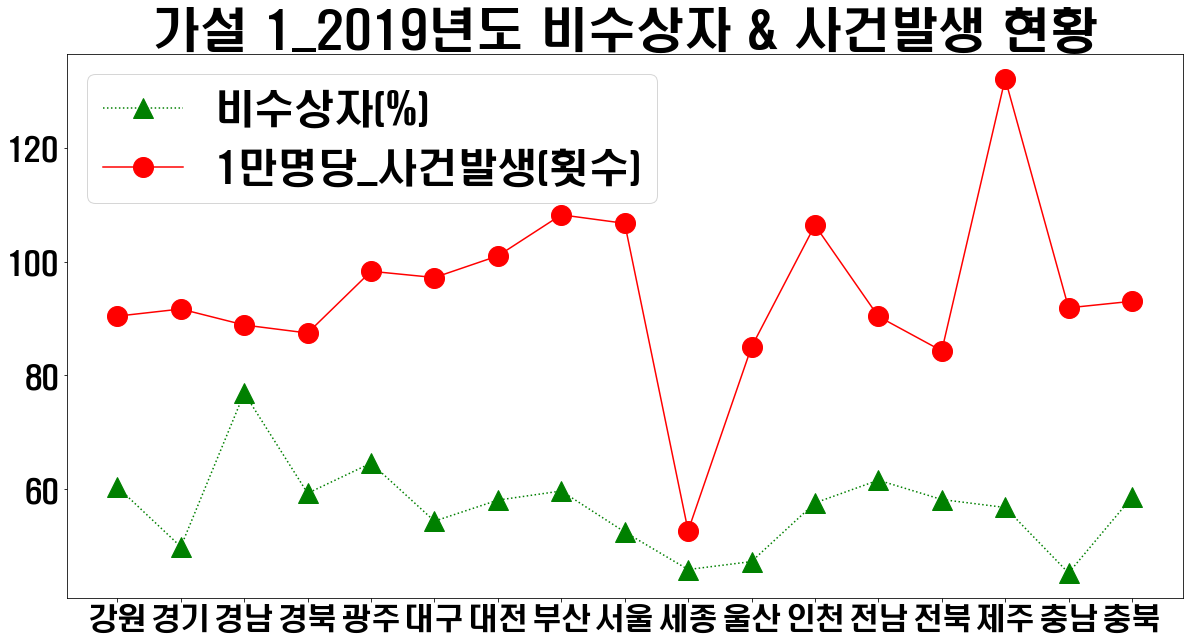

In [97]:
plt.rc('font', size=40)
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(unimage.index, unimage['2019비수상자'],'g^:',label='비수상자(%)',markersize=20)
ax1.set(title='가설 1_2019년도 비수상자 & 사건발생 현황')
ax1.plot(crime_year.index,crime_year['2019_1만명당_사건발생횟수'],'ro-',label='1만명당_사건발생(횟수)',markersize=20)
ax1.legend(fontsize=40)
ax1.tick_params(labelsize=30)


 # 가설2. 해마다 신체등급이 낮아 질수록 범죄율도 증가할까?

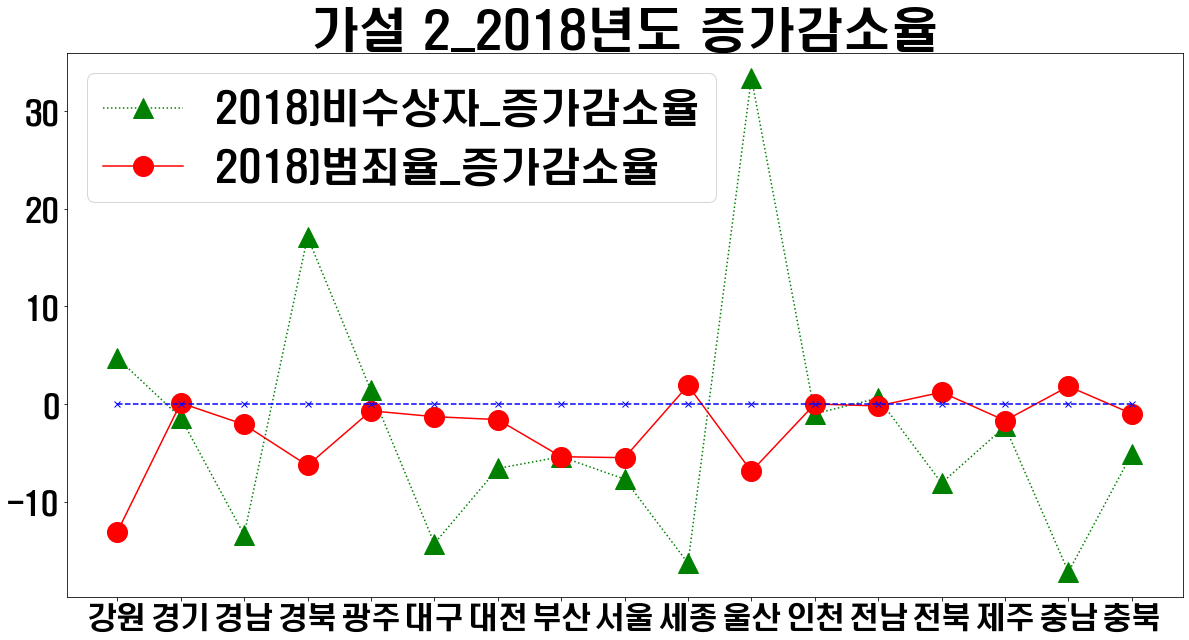

In [93]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(unimage_increase.index,unimage_increase['2018)비수상자_증가감소율'],'g^:',markersize=20,label='2018)비수상자_증가감소율')
ax1.plot(crime_increase.index,crime_increase['2018)범죄율_증가감소율'],'ro-',markersize=20,label='2018)범죄율_증가감소율')
ax1.set(title='가설 2_2018년도 증가감소율')
ax1.plot(num_0.index,num_0['숫자'],'bx--')
ax1.tick_params(labelsize=30)
ax1.legend(fontsize=40)

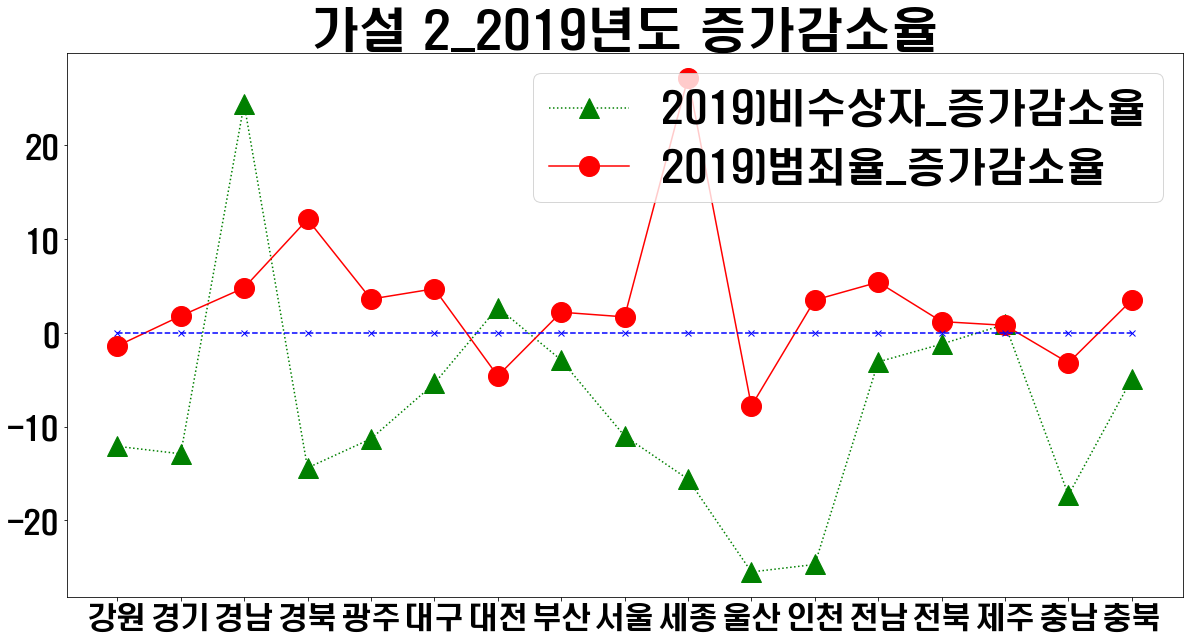

In [96]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(unimage_increase.index,unimage_increase['2019)비수상자_증가감소율'],'g^:',markersize=20,label='2019)비수상자_증가감소율')
ax1.plot(crime_increase.index,crime_increase['2019)범죄율_증가감소율'],'ro-',markersize=20,label='2019)범죄율_증가감소율')
ax1.set(title='가설 2_2019년도 증가감소율')
ax1.plot(num_0.index,num_0['숫자'],'bx--')
ax1.tick_params(labelsize=30)
ax1.legend(fontsize=40)

